# PREDICTING CRIME RATE IN CHICAGO USING FACEBOOK PROPHET 

# STEP #0: PROBLEM STATEMENT

- The Chicago Crime dataset contains a summary of the reported crimes occurred in the City of Chicago from 2001 to 2017 which     consists of approx. 8000000 rows. 
- Dataset has been obtained from the Chicago Police Department's CLEAR (Citizen Law Enforcement Analysis and Reporting) system.
- Dataset contains the following columns: 
    - ID: Unique identifier for the record.
    - Case Number: The Chicago Police Department RD Number (Records Division Number), which is unique to the incident.
    - Date: Date when the incident occurred.
    - Block: address where the incident occurred
    - IUCR: The Illinois Unifrom Crime Reporting code.
    - Primary Type: The primary description of the IUCR code.
    - Description: The secondary description of the IUCR code, a subcategory of the primary description.
    - Location Description: Description of the location where the incident occurred.
    - Arrest: Indicates whether an arrest was made.
    - Domestic: Indicates whether the incident was domestic-related as defined by the Illinois Domestic Violence Act.
    - Beat: Indicates the beat where the incident occurred. A beat is the smallest police geographic area – each beat has a dedicated police beat car. 
    - District: Indicates the police district where the incident occurred. 
    - Ward: The ward (City Council district) where the incident occurred. 
    - Community Area: Indicates the community area where the incident occurred. Chicago has 77 community areas. 
    - FBI Code: Indicates the crime classification as outlined in the FBI's National Incident-Based Reporting System (NIBRS). 
    - X Coordinate: The x coordinate of the location where the incident occurred in State Plane Illinois East NAD 1983 projection. 
    - Y Coordinate: The y coordinate of the location where the incident occurred in State Plane Illinois East NAD 1983 projection. 
    - Year: Year the incident occurred.
    - Updated On: Date and time the record was last updated.
    - Latitude: The latitude of the location where the incident occurred. This location is shifted from the actual location for partial redaction but falls on the same block.
    - Longitude: The longitude of the location where the incident occurred. This location is shifted from the actual location for partial redaction but falls on the same block.
    - Location: The location where the incident occurred in a format that allows for creation of maps and other geographic operations on this data portal. This location is shifted from the actual location for partial redaction but falls on the same block.
- Datasource: https://bit.ly/3xhIFaZ

- You must install fbprophet package as follows: 
     conda install -c conda-forge fbprophet
     
- Prophet is open source software released by Facebook’s Core Data Science team.

- Prophet is a procedure for forecasting time series data based on an additive model where non-linear trends are fit with yearly, weekly, and daily seasonality, plus holiday effects. 

- Prophet works best with time series that have strong seasonal effects and several seasons of historical data. 

- For more information, please check this out: https://research.fb.com/prophet-forecasting-at-scale/
https://facebook.github.io/prophet/docs/quick_start.html#python-api


# STEP #1: IMPORTING DATA

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import random
import seaborn as sns
from fbprophet import Prophet

In [2]:
# dataframes creation for both training and testing datasets 
chicago_df_1 = pd.read_csv('Chicago_Crimes_2001_to_2004.csv', error_bad_lines= False)
chicago_df_2 = pd.read_csv('Chicago_Crimes_2005_to_2007.csv', error_bad_lines= False)
chicago_df_3 = pd.read_csv('Chicago_Crimes_2008_to_2011.csv', error_bad_lines= False)
chicago_df_4 = pd.read_csv('Chicago_Crimes_2012_to_2017.csv', error_bad_lines= False)

C:\Users\acer\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)
b'Skipping line 1513591: expected 23 fields, saw 24\n'
C:\Users\acer\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (17,20) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)
b'Skipping line 533719: expected 23 fields, saw 24\n'
b'Skipping line 1149094: expected 23 fields, saw 41\n'


In [3]:
chicago_df_1.shape

(1923515, 23)

In [4]:
chicago_df_2.shape

(1872343, 23)

In [5]:
chicago_df_3.shape

(2688710, 23)

In [6]:
chicago_df_4.shape

(1456714, 23)

In [7]:
chicago_df = pd.concat([chicago_df_1, chicago_df_2, chicago_df_3, chicago_df_4], ignore_index=False, axis=0)

In [8]:
chicago_df.shape

(7941282, 23)

# STEP #2: EXPLORING THE DATASET  

In [9]:
# Let's view the head of the training dataset
chicago_df.head(10)

,Unnamed: 0,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,879,4786321,HM399414,01/01/2004 12:01:00 AM,082XX S COLES AVE,0840,THEFT,FINANCIAL ID THEFT: OVER $300,RESIDENCE,False,...,7.0,46.0,06,NaN,NaN,2004.0,08/17/2015 03:03:40 PM,NaN,NaN,NaN
1,2544,4676906,HM278933,03/01/2003 12:00:00 AM,004XX W 42ND PL,2825,OTHER OFFENSE,HARASSMENT BY TELEPHONE,RESIDENCE,False,...,11.0,61.0,26,1173974.0,1876757.0,2003.0,04/15/2016 08:55:02 AM,41.817229,-87.637328,"(41.817229156, -87.637328162)"
2,2919,4789749,HM402220,06/20/2004 11:00:00 AM,025XX N KIMBALL AVE,1752,OFFENSE INVOLVING CHILDREN,AGG CRIM SEX ABUSE FAM MEMBER,RESIDENCE,False,...,35.0,22.0,20,NaN,NaN,2004.0,08/17/2015 03:03:40 PM,NaN,NaN,NaN
3,2927,4789765,HM402058,12/30/2004 08:00:00 PM,045XX W MONTANA ST,0840,THEFT,FINANCIAL ID THEFT: OVER $300,OTHER,False,...,31.0,20.0,06,NaN,NaN,2004.0,08/17/2015 03:03:40 PM,NaN,NaN,NaN
4,3302,4677901,HM275615,05/01/2003 01:00:00 AM,111XX S NORMAL AVE,0841,THEFT,FINANCIAL ID THEFT:$300 &UNDER,RESIDENCE,False,...,34.0,49.0,06,1174948.0,1831051.0,2003.0,04/15/2016 08:55:02 AM,41.691785,-87.635116,"(41.691784636, -87.635115968)"
5,3633,4838048,HM440266,08/01/2004 12:01:00 AM,012XX S HARDING AVE,0841,THEFT,FINANCIAL ID THEFT:$300 &UNDER,APARTMENT,False,...,24.0,29.0,06,NaN,NaN,2004.0,08/17/2015 03:03:40 PM,NaN,NaN,NaN
6,3756,4791194,HM403711,01/01/2001 11:00:00 AM,114XX S ST LAWRENCE AVE,0266,CRIM SEXUAL ASSAULT,PREDATORY,RESIDENCE,True,...,9.0,50.0,02,1182247.0,1829375.0,2001.0,08/29/2006 03:46:28 AM,41.68702,-87.608445,"(41.687020002, -87.60844523)"
7,4502,4679521,HM216293,03/15/2003 12:00:00 AM,090XX S RACINE AVE,5007,OTHER OFFENSE,OTHER WEAPONS VIOLATION,RESIDENCE PORCH/HALLWAY,False,...,21.0,73.0,26,1169911.0,1844832.0,2003.0,04/15/2016 08:55:02 AM,41.729712,-87.653159,"(41.729712374, -87.653158513)"
8,4564,4792195,HM405396,09/16/2004 10:00:00 AM,003XX W HUBBARD ST,0890,THEFT,FROM BUILDING,RESIDENCE,False,...,42.0,8.0,06,NaN,NaN,2004.0,08/17/2015 03:03:40 PM,NaN,NaN,NaN
9,4904,4680124,HM282389,01/01/2003 12:00:00 AM,009XX S SPAULDING AVE,0840,THEFT,FINANCIAL ID THEFT: OVER $300,RESIDENCE,False,...,24.0,29.0,06,1154521.0,1895755.0,2003.0,04/15/2016 08:55:02 AM,41.869772,-87.708180,"(41.869772159, -87.708180162)"


In [10]:
# Let's view the last elements in the training dataset
chicago_df.tail(10)

,Unnamed: 0,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
1456704,6249417,10508666,HZ250497,05/03/2016 11:30:00 PM,053XX S PULASKI RD,0320,ROBBERY,STRONGARM - NO WEAPON,SIDEWALK,False,...,23.0,62.0,03,1150606.0,1868988.0,2016.0,05/10/2016 03:56:50 PM,41.796397,-87.723251,"(41.79639731, -87.723251281)"
1456705,6249592,10508671,HZ250526,05/03/2016 11:50:00 PM,036XX E 106TH ST,502P,OTHER OFFENSE,FALSE/STOLEN/ALTERED TRP,ALLEY,True,...,10.0,52.0,26,1202327.0,1835278.0,2016.0,05/10/2016 03:56:50 PM,41.702731,-87.534736,"(41.702731182, -87.534736413)"
1456706,6249615,10508672,HZ250441,05/03/2016 10:25:00 PM,071XX S MOZART ST,0460,BATTERY,SIMPLE,SIDEWALK,True,...,18.0,66.0,08B,1158610.0,1857066.0,2016.0,05/10/2016 03:56:50 PM,41.763522,-87.694225,"(41.763522012, -87.69422464)"
1456707,6249936,10508675,HZ250502,05/03/2016 11:00:00 PM,085XX S MAY ST,0320,ROBBERY,STRONGARM - NO WEAPON,SIDEWALK,False,...,21.0,71.0,03,1170146.0,1848113.0,2016.0,05/10/2016 03:56:50 PM,41.738711,-87.652203,"(41.738710803, -87.652202523)"
1456708,6250154,10508678,HZ250481,05/03/2016 11:28:00 PM,088XX S LAFLIN ST,041A,BATTERY,AGGRAVATED: HANDGUN,STREET,False,...,21.0,71.0,04B,1167880.0,1846134.0,2016.0,05/10/2016 03:56:50 PM,41.733329,-87.660561,"(41.733329054, -87.660561367)"
1456709,6250330,10508679,HZ250507,05/03/2016 11:33:00 PM,026XX W 23RD PL,0486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,True,...,28.0,30.0,08B,1159105.0,1888300.0,2016.0,05/10/2016 03:56:50 PM,41.849222,-87.691556,"(41.849222028, -87.69155551)"
1456710,6251089,10508680,HZ250491,05/03/2016 11:30:00 PM,073XX S HARVARD AVE,1310,CRIMINAL DAMAGE,TO PROPERTY,APARTMENT,True,...,17.0,69.0,14,1175230.0,1856183.0,2016.0,05/10/2016 03:56:50 PM,41.760744,-87.633335,"(41.760743949, -87.63333531)"
1456711,6251349,10508681,HZ250479,05/03/2016 12:15:00 AM,024XX W 63RD ST,041A,BATTERY,AGGRAVATED: HANDGUN,SIDEWALK,False,...,15.0,66.0,04B,1161027.0,1862810.0,2016.0,05/10/2016 03:56:50 PM,41.779235,-87.685207,"(41.779234743, -87.685207125)"
1456712,6253257,10508690,HZ250370,05/03/2016 09:07:00 PM,082XX S EXCHANGE AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,SIDEWALK,False,...,7.0,46.0,08B,1197261.0,1850727.0,2016.0,05/10/2016 03:56:50 PM,41.745252,-87.552773,"(41.745251975, -87.552773464)"
1456713,6253474,10508692,HZ250517,05/03/2016 11:38:00 PM,001XX E 75TH ST,5007,OTHER OFFENSE,OTHER WEAPONS VIOLATION,PARKING LOT/GARAGE(NON.RESID.),True,...,6.0,69.0,26,1178696.0,1855324.0,2016.0,05/10/2016 03:56:50 PM,41.758309,-87.620658,"(41.75830866, -87.620658418)"


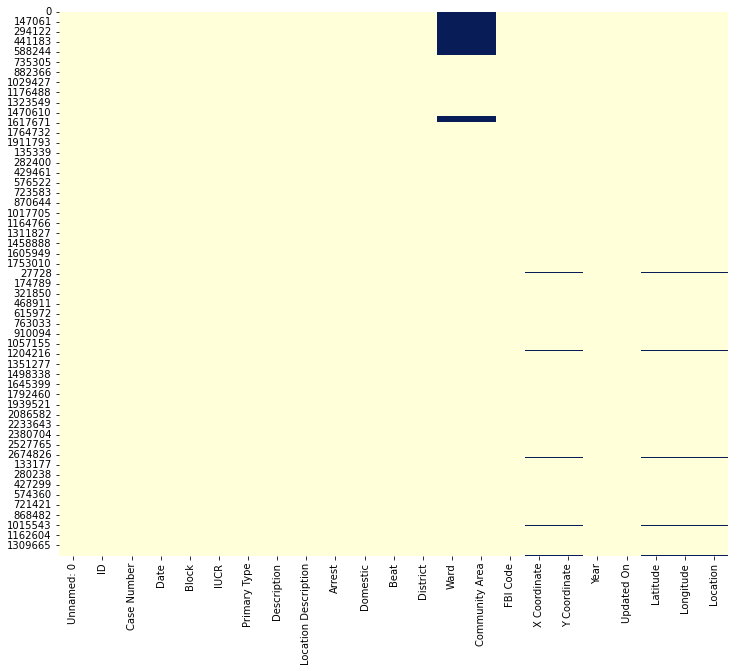

In [11]:
# Let's see how many null elements are contained in the data
plt.figure(figsize=(12,10))
sns.heatmap(chicago_df.isnull(), cbar = False, cmap = 'YlGnBu');

In [12]:
chicago_df.isnull().sum()

Unnamed: 0                   0
ID                           0
Case Number                  7
Date                         0
Block                        0
IUCR                         0
Primary Type                 0
Description                  0
Location Description      1990
Arrest                       0
Domestic                     0
Beat                         0
District                    91
Ward                    700224
Community Area          702091
FBI Code                     0
X Coordinate            105573
Y Coordinate            105573
Year                         0
Updated On                   0
Latitude                105573
Longitude               105574
Location                105574
dtype: int64

In [13]:
# ID Case Number Date Block IUCR Primary Type Description Location Description Arrest Domestic Beat District Ward Community Area FBI Code X Coordinate Y Coordinate Year Updated On Latitude Longitude Location
chicago_df.drop(['Unnamed: 0', 'Case Number', 'ID', 'IUCR', 'X Coordinate', 'Y Coordinate','Updated On','Year', 'FBI Code', 'Beat', 'Ward','Community Area', 'Location', 'District', 'Latitude' , 'Longitude'], inplace=True, axis=1)

In [14]:
chicago_df

,Date,Block,Primary Type,Description,Location Description,Arrest,Domestic
0,01/01/2004 12:01:00 AM,082XX S COLES AVE,THEFT,FINANCIAL ID THEFT: OVER $300,RESIDENCE,False,False
1,03/01/2003 12:00:00 AM,004XX W 42ND PL,OTHER OFFENSE,HARASSMENT BY TELEPHONE,RESIDENCE,False,True
2,06/20/2004 11:00:00 AM,025XX N KIMBALL AVE,OFFENSE INVOLVING CHILDREN,AGG CRIM SEX ABUSE FAM MEMBER,RESIDENCE,False,False
3,12/30/2004 08:00:00 PM,045XX W MONTANA ST,THEFT,FINANCIAL ID THEFT: OVER $300,OTHER,False,False
4,05/01/2003 01:00:00 AM,111XX S NORMAL AVE,THEFT,FINANCIAL ID THEFT:$300 &UNDER,RESIDENCE,False,False
...,...,...,...,...,...,...,...
1456709,05/03/2016 11:33:00 PM,026XX W 23RD PL,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,True,True
1456710,05/03/2016 11:30:00 PM,073XX S HARVARD AVE,CRIMINAL DAMAGE,TO PROPERTY,APARTMENT,True,True
1456711,05/03/2016 12:15:00 AM,024XX W 63RD ST,BATTERY,AGGRAVATED: HANDGUN,SIDEWALK,False,False
1456712,05/03/2016 09:07:00 PM,082XX S EXCHANGE AVE,BATTERY,DOMESTIC BATTERY SIMPLE,SIDEWALK,False,True


In [15]:
# Assembling a datetime by rearranging the dataframe column "Date". 

chicago_df.Date = pd.to_datetime(chicago_df.Date, format='%m/%d/%Y %I:%M:%S %p')

In [16]:
chicago_df

,Date,Block,Primary Type,Description,Location Description,Arrest,Domestic
0,2004-01-01 00:01:00,082XX S COLES AVE,THEFT,FINANCIAL ID THEFT: OVER $300,RESIDENCE,False,False
1,2003-03-01 00:00:00,004XX W 42ND PL,OTHER OFFENSE,HARASSMENT BY TELEPHONE,RESIDENCE,False,True
2,2004-06-20 11:00:00,025XX N KIMBALL AVE,OFFENSE INVOLVING CHILDREN,AGG CRIM SEX ABUSE FAM MEMBER,RESIDENCE,False,False
3,2004-12-30 20:00:00,045XX W MONTANA ST,THEFT,FINANCIAL ID THEFT: OVER $300,OTHER,False,False
4,2003-05-01 01:00:00,111XX S NORMAL AVE,THEFT,FINANCIAL ID THEFT:$300 &UNDER,RESIDENCE,False,False
...,...,...,...,...,...,...,...
1456709,2016-05-03 23:33:00,026XX W 23RD PL,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,True,True
1456710,2016-05-03 23:30:00,073XX S HARVARD AVE,CRIMINAL DAMAGE,TO PROPERTY,APARTMENT,True,True
1456711,2016-05-03 00:15:00,024XX W 63RD ST,BATTERY,AGGRAVATED: HANDGUN,SIDEWALK,False,False
1456712,2016-05-03 21:07:00,082XX S EXCHANGE AVE,BATTERY,DOMESTIC BATTERY SIMPLE,SIDEWALK,False,True


In [17]:
# setting the index to be the date 
chicago_df.index = pd.DatetimeIndex(chicago_df.Date)

In [18]:
chicago_df

,Date,Block,Primary Type,Description,Location Description,Arrest,Domestic
Date,,,,,,,
2004-01-01 00:01:00,2004-01-01 00:01:00,082XX S COLES AVE,THEFT,FINANCIAL ID THEFT: OVER $300,RESIDENCE,False,False
2003-03-01 00:00:00,2003-03-01 00:00:00,004XX W 42ND PL,OTHER OFFENSE,HARASSMENT BY TELEPHONE,RESIDENCE,False,True
2004-06-20 11:00:00,2004-06-20 11:00:00,025XX N KIMBALL AVE,OFFENSE INVOLVING CHILDREN,AGG CRIM SEX ABUSE FAM MEMBER,RESIDENCE,False,False
2004-12-30 20:00:00,2004-12-30 20:00:00,045XX W MONTANA ST,THEFT,FINANCIAL ID THEFT: OVER $300,OTHER,False,False
2003-05-01 01:00:00,2003-05-01 01:00:00,111XX S NORMAL AVE,THEFT,FINANCIAL ID THEFT:$300 &UNDER,RESIDENCE,False,False
...,...,...,...,...,...,...,...
2016-05-03 23:33:00,2016-05-03 23:33:00,026XX W 23RD PL,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,True,True
2016-05-03 23:30:00,2016-05-03 23:30:00,073XX S HARVARD AVE,CRIMINAL DAMAGE,TO PROPERTY,APARTMENT,True,True
2016-05-03 00:15:00,2016-05-03 00:15:00,024XX W 63RD ST,BATTERY,AGGRAVATED: HANDGUN,SIDEWALK,False,False


In [19]:
chicago_df['Primary Type'].value_counts()

THEFT                                1640506
BATTERY                              1442716
CRIMINAL DAMAGE                       923000
NARCOTICS                             885431
OTHER OFFENSE                         491922
ASSAULT                               481661
BURGLARY                              470958
MOTOR VEHICLE THEFT                   370548
ROBBERY                               300453
DECEPTIVE PRACTICE                    280931
CRIMINAL TRESPASS                     229366
PROSTITUTION                           86401
WEAPONS VIOLATION                      77429
PUBLIC PEACE VIOLATION                 58548
OFFENSE INVOLVING CHILDREN             51441
CRIM SEXUAL ASSAULT                    29868
SEX OFFENSE                            28707
GAMBLING                               18806
LIQUOR LAW VIOLATION                   17513
INTERFERENCE WITH PUBLIC OFFICER       15710
ARSON                                  13097
HOMICIDE                                9051
KIDNAPPING

In [20]:
chicago_df['Primary Type'].value_counts().iloc[:15]

THEFT                         1640506
BATTERY                       1442716
CRIMINAL DAMAGE                923000
NARCOTICS                      885431
OTHER OFFENSE                  491922
ASSAULT                        481661
BURGLARY                       470958
MOTOR VEHICLE THEFT            370548
ROBBERY                        300453
DECEPTIVE PRACTICE             280931
CRIMINAL TRESPASS              229366
PROSTITUTION                    86401
WEAPONS VIOLATION               77429
PUBLIC PEACE VIOLATION          58548
OFFENSE INVOLVING CHILDREN      51441
Name: Primary Type, dtype: int64

In [21]:
chicago_df['Primary Type'].value_counts().iloc[:15].index

Index(['THEFT', 'BATTERY', 'CRIMINAL DAMAGE', 'NARCOTICS', 'OTHER OFFENSE',
       'ASSAULT', 'BURGLARY', 'MOTOR VEHICLE THEFT', 'ROBBERY',
       'DECEPTIVE PRACTICE', 'CRIMINAL TRESPASS', 'PROSTITUTION',
       'WEAPONS VIOLATION', 'PUBLIC PEACE VIOLATION',
       'OFFENSE INVOLVING CHILDREN'],
      dtype='object')

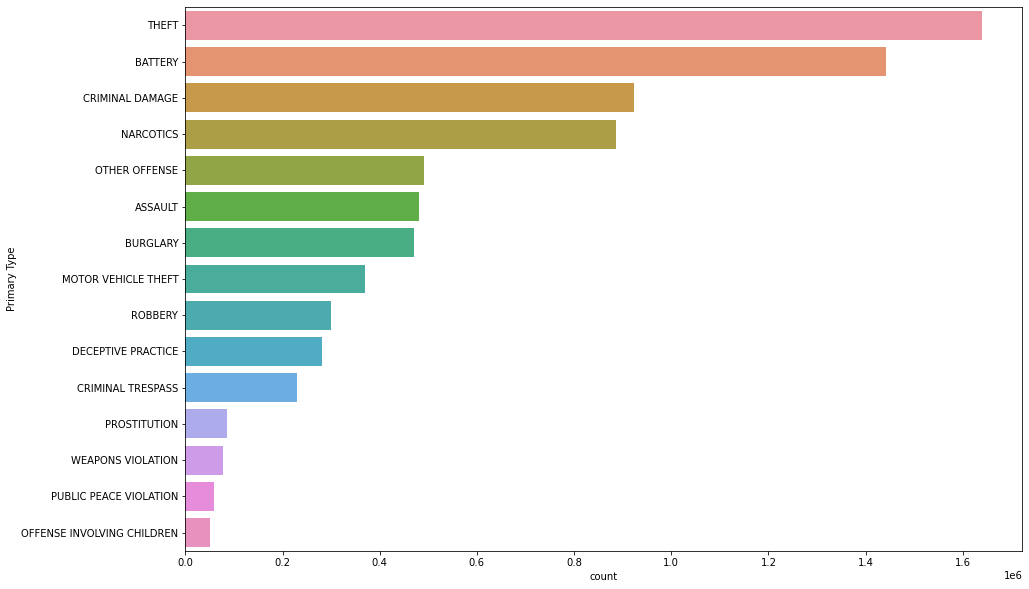

In [22]:
plt.figure(figsize = (15, 10))
sns.countplot(y= 'Primary Type', data = chicago_df, order = chicago_df['Primary Type'].value_counts().iloc[:15].index);

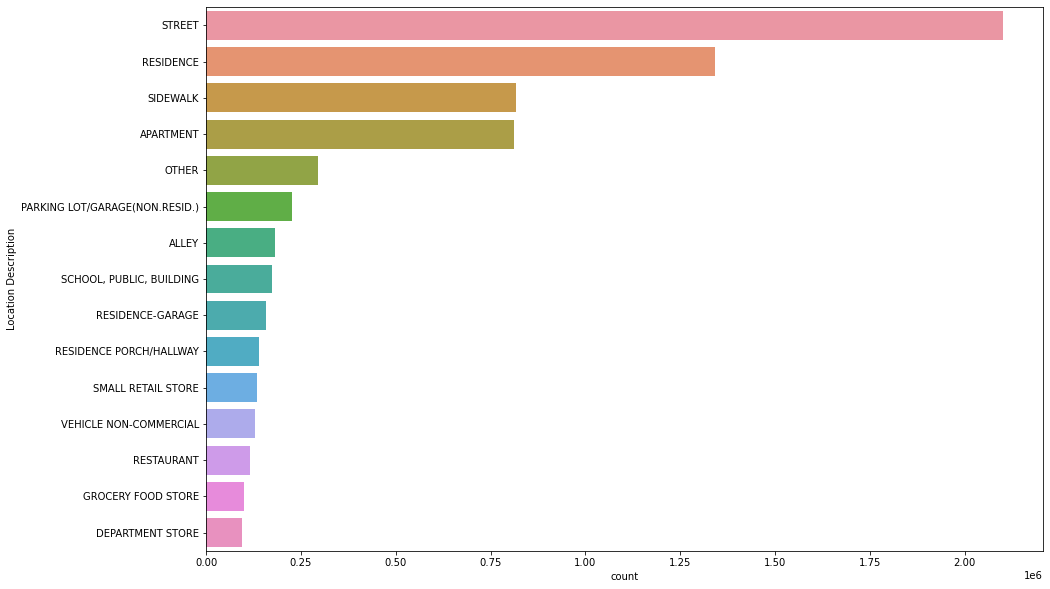

In [23]:
plt.figure(figsize = (15, 10))
sns.countplot(y= 'Location Description', data = chicago_df, order = chicago_df['Location Description'].value_counts().iloc[:15].index);

In [24]:
chicago_df.resample('Y').size()

Date
2001-12-31    568518
2002-12-31    490879
2003-12-31    475913
2004-12-31    388205
2005-12-31    455811
2006-12-31    794684
2007-12-31    621848
2008-12-31    852053
2009-12-31    783900
2010-12-31    700691
2011-12-31    352066
2012-12-31    335670
2013-12-31    306703
2014-12-31    274527
2015-12-31    262995
2016-12-31    265462
2017-12-31     11357
Freq: A-DEC, dtype: int64

Text(0, 0.5, 'Number of Crimes')

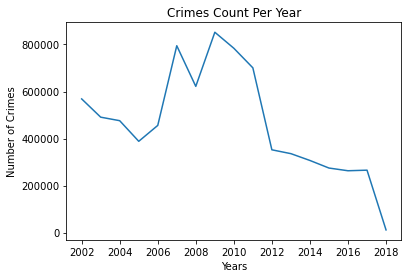

In [25]:
# Resample is a Convenience method for frequency conversion and resampling of time series.

plt.plot(chicago_df.resample('Y').size())
plt.title('Crimes Count Per Year')
plt.xlabel('Years')
plt.ylabel('Number of Crimes')

In [26]:
chicago_df.resample('M').size()

Date
2001-01-31    74995
2001-02-28    66288
2001-03-31    53122
2001-04-30    40166
2001-05-31    41876
              ...  
2016-09-30    23235
2016-10-31    23314
2016-11-30    21140
2016-12-31    19580
2017-01-31    11357
Freq: M, Length: 193, dtype: int64

Text(0, 0.5, 'Number of Crimes')

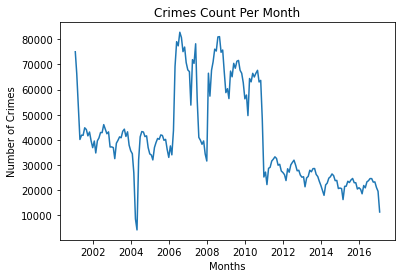

In [27]:
# Resample is a Convenience method for frequency conversion and resampling of time series.

plt.plot(chicago_df.resample('M').size())
plt.title('Crimes Count Per Month')
plt.xlabel('Months')
plt.ylabel('Number of Crimes')

In [28]:
chicago_df.resample('Q').size()

Date
2001-03-31    194405
2001-06-30    123865
2001-09-30    130518
2001-12-31    119730
2002-03-31    113998
               ...  
2016-03-31     60843
2016-06-30     68085
2016-09-30     72500
2016-12-31     64034
2017-03-31     11357
Freq: Q-DEC, Length: 65, dtype: int64

Text(0, 0.5, 'Number of Crimes')

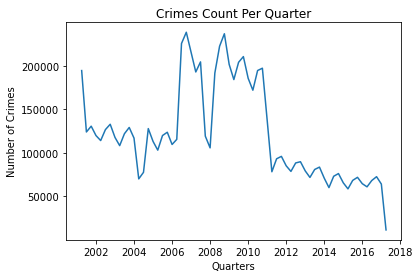

In [29]:
# Resample is a Convenience method for frequency conversion and resampling of time series.

plt.plot(chicago_df.resample('Q').size())
plt.title('Crimes Count Per Quarter')
plt.xlabel('Quarters')
plt.ylabel('Number of Crimes')

# STEP #3: PREPARING THE DATA

In [30]:
chicago_prophet = chicago_df.resample('M').size().reset_index()

In [31]:
chicago_prophet

,Date,0
0,2001-01-31,74995
1,2001-02-28,66288
2,2001-03-31,53122
3,2001-04-30,40166
4,2001-05-31,41876
...,...,...
188,2016-09-30,23235
189,2016-10-31,23314
190,2016-11-30,21140
191,2016-12-31,19580


In [32]:
chicago_prophet.columns = ['Date', 'Crime Count']

In [33]:
chicago_prophet

,Date,Crime Count
0,2001-01-31,74995
1,2001-02-28,66288
2,2001-03-31,53122
3,2001-04-30,40166
4,2001-05-31,41876
...,...,...
188,2016-09-30,23235
189,2016-10-31,23314
190,2016-11-30,21140
191,2016-12-31,19580


In [34]:
chicago_prophet_df = pd.DataFrame(chicago_prophet)

In [35]:
chicago_prophet_df

,Date,Crime Count
0,2001-01-31,74995
1,2001-02-28,66288
2,2001-03-31,53122
3,2001-04-30,40166
4,2001-05-31,41876
...,...,...
188,2016-09-30,23235
189,2016-10-31,23314
190,2016-11-30,21140
191,2016-12-31,19580


# STEP #4: MAKE PREDICTIONS

In [36]:
chicago_prophet_df.columns

Index(['Date', 'Crime Count'], dtype='object')

In [37]:
chicago_prophet_df_final = chicago_prophet_df.rename(columns={'Date':'ds', 'Crime Count':'y'})

In [38]:
chicago_prophet_df_final

,ds,y
0,2001-01-31,74995
1,2001-02-28,66288
2,2001-03-31,53122
3,2001-04-30,40166
4,2001-05-31,41876
...,...,...
188,2016-09-30,23235
189,2016-10-31,23314
190,2016-11-30,21140
191,2016-12-31,19580


In [39]:
m = Prophet()
m.fit(chicago_prophet_df_final);

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [40]:
# Forcasting into the future
future = m.make_future_dataframe(periods=365)
forecast = m.predict(future)

In [41]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2001-01-31,40553.469848,23069.151691,55672.491250,40553.469848,40553.469848,-1576.979214,-1576.979214,-1576.979214,-1576.979214,-1576.979214,-1576.979214,0.0,0.0,0.0,38976.490634
1,2001-02-28,40700.768217,18751.290902,50494.426529,40700.768217,40700.768217,-6453.880275,-6453.880275,-6453.880275,-6453.880275,-6453.880275,-6453.880275,0.0,0.0,0.0,34246.887942
2,2001-03-31,40863.848554,23207.109504,53890.679771,40863.848554,40863.848554,-2068.378242,-2068.378242,-2068.378242,-2068.378242,-2068.378242,-2068.378242,0.0,0.0,0.0,38795.470312
3,2001-04-30,41021.668234,23436.133414,54987.113135,41021.668234,41021.668234,-1473.074154,-1473.074154,-1473.074154,-1473.074154,-1473.074154,-1473.074154,0.0,0.0,0.0,39548.594080
4,2001-05-31,41184.748571,29520.618208,61302.967074,41184.748571,41184.748571,3882.710448,3882.710448,3882.710448,3882.710448,3882.710448,3882.710448,0.0,0.0,0.0,45067.459019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
553,2018-01-27,9103.019235,-9616.354703,21632.567205,8825.456438,9372.965145,-3423.691734,-3423.691734,-3423.691734,-3423.691734,-3423.691734,-3423.691734,0.0,0.0,0.0,5679.327501
554,2018-01-28,9089.027815,-9029.928974,20866.469813,8810.614824,9359.920037,-2770.715779,-2770.715779,-2770.715779,-2770.715779,-2770.715779,-2770.715779,0.0,0.0,0.0,6318.312036
555,2018-01-29,9075.036395,-8849.234265,24210.939116,8795.266233,9346.874929,-2233.869517,-2233.869517,-2233.869517,-2233.869517,-2233.869517,-2233.869517,0.0,0.0,0.0,6841.166877
556,2018-01-30,9061.044974,-10458.631171,23128.999442,8780.195267,9333.884101,-1838.620259,-1838.620259,-1838.620259,-1838.620259,-1838.620259,-1838.620259,0.0,0.0,0.0,7222.424715


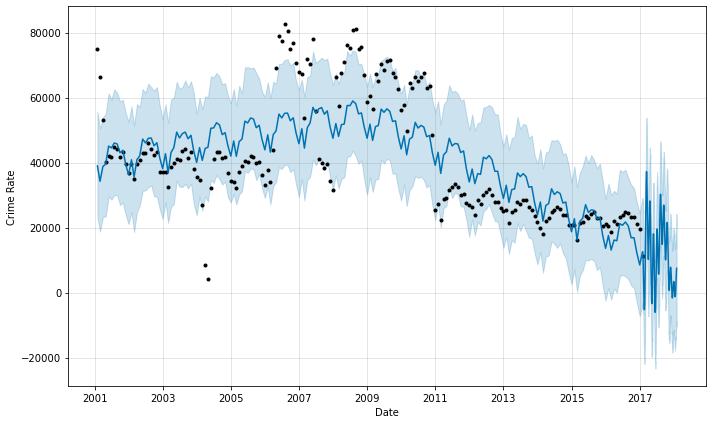

In [42]:
figure = m.plot(forecast, xlabel='Date', ylabel='Crime Rate')

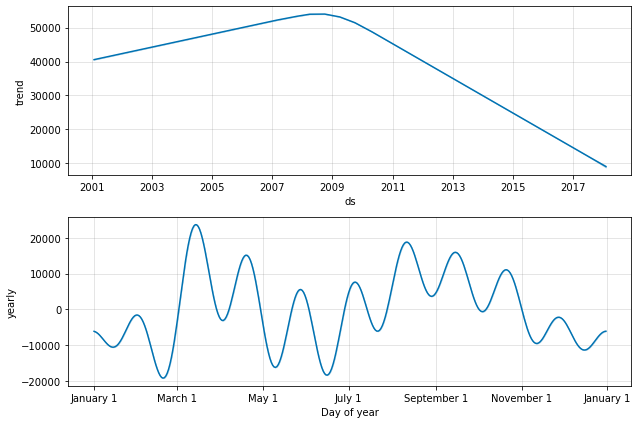

In [43]:
figure3 = m.plot_components(forecast)

# GREAT JOB!